In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd

# Set directory containing the folders with images
parent_dir = 'path/to/directory'

# Create empty list to store pixel data
pixel_data = []
folder_names = []

# Loop through all folders in parent directory
for folder_name in os.listdir(parent_dir):
    # Check if the current item is a directory
    if os.path.isdir(os.path.join(parent_dir, folder_name)):
        # Loop through all images in directory
        for filename in os.listdir(os.path.join(parent_dir, folder_name)):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Open image using PIL library
                img = Image.open(os.path.join(parent_dir, folder_name, filename))

                # Convert image to numpy array
                img_array = np.array(img)

                # Calculate maximum shape of all images
                max_shape = np.maximum.reduce([img_array.shape, np.zeros(3, dtype=int)])

                # Create empty numpy array to store image data
                img_data = np.zeros(max_shape, dtype=np.uint8)

                # Copy image to img_data and pad with zeros if necessary
                img_data[:img_array.shape[0], :img_array.shape[1], :img_array.shape[2]] = img_array

                # Append img_data to pixel_data list
                pixel_data.append(img_data.flatten())

                # Append folder name to folder_names list
                folder_names.append(folder_name)

# Convert pixel_data list and folder_names list to numpy arrays
pixel_data_np = np.array(pixel_data)
folder_names_np = np.array(folder_names)

# Create pandas dataframe from pixel_data_np and folder_names_np numpy arrays
df = pd.DataFrame(pixel_data_np)
df['folder_name'] = folder_names_np

# save the dataframe as a csv file
df.to_csv("output.csv", index=False)


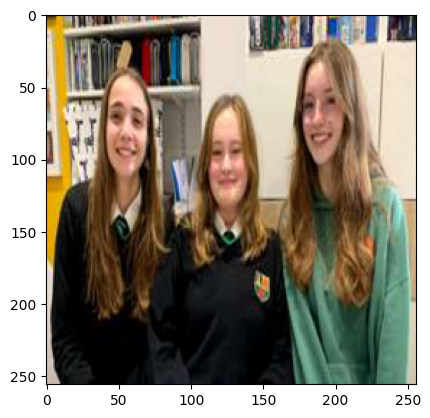

In [33]:
import matplotlib.pyplot as plt

# Retrieve the first row of the dataframe
first_image = df.iloc[10]

# Reshape the flattened array to the original 2D shape of the image
reshaped_image = first_image.values.reshape(img_size[0], img_size[1], 3)

# Display the image using matplotlib
plt.imshow(reshaped_image)
plt.show()
